# Langchain with Google Gemini API

* 32K context window for text
* Free to use right now, within limits
* **Features supported:**
  * function calling
  * embeddings
  * semantic retrieval
  * custom knowledge grounding
  * chat functionality
* Supports 38 languages across 180+ countries
* **Gemini Pro** accepts text as input and generates text as output.
* **Gemini Pro Vision** takes text and image as input and procdues output as text

* **Official Notebook:** https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb
* **LangChain-Gemini Documentation:** https://python.langchain.com/docs/integrations/chat/google_generative_ai

## Pre-requisites

In [1]:
!pip install -q -U google-generativeai langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.8 MB/s eta 0:00:00


## Import Libraries

In [2]:
import pathlib
import textwrap
import getpass

import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain


# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Gemini-Pro API

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In [3]:
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API Key")

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

Enter API Key··········


### Available Models

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


## Example: Text Generation

In [5]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
result = llm.invoke("write an essay about IIT Delhi")
to_markdown(result.content)

> ## The Crucible of Innovation: An Exploration of IIT Delhi
> 
> The Indian Institute of Technology Delhi, or IIT Delhi, stands as a towering monument to India's aspiration for technological prowess. More than just an academic institution, it's a crucible where raw talent is forged into innovative minds, a place where the seeds of technological advancement are sown and nurtured. For decades, IIT Delhi has consistently produced leaders, entrepreneurs, and researchers who have shaped not only India's technological landscape but also contributed significantly to the global stage. Its reputation as a premier engineering institute is well-deserved, built on a foundation of rigorous academics, a culture of research, and a relentless pursuit of excellence.
> 
> The academic rigor at IIT Delhi is legendary. The curriculum, constantly evolving to reflect the latest advancements, pushes students to their intellectual limits. From foundational courses in physics, mathematics, and chemistry to highly specialized programs in various engineering disciplines, the academic experience is designed to foster critical thinking, problem-solving skills, and a deep understanding of fundamental principles. The highly competitive environment, though often challenging, cultivates a spirit of perseverance and a drive to excel. This rigorous training equips graduates with the technical competence and analytical abilities necessary to tackle complex real-world problems.
> 
> Beyond the classroom, IIT Delhi fosters a vibrant research culture. The institute boasts state-of-the-art laboratories and research centers, attracting some of the brightest minds in the country. Faculty members are actively engaged in cutting-edge research across diverse fields, from nanotechnology and artificial intelligence to biotechnology and sustainable energy. This environment of active research not only contributes to scientific advancement but also provides students with invaluable opportunities to participate in groundbreaking projects, enhancing their learning experience and fostering a culture of innovation. The emphasis on research also ensures that the curriculum remains relevant and aligned with the latest developments in the field.
> 
> Furthermore, IIT Delhi is more than just a haven for academics and research. It is a vibrant community that encourages holistic development. The diverse student body, drawn from all corners of India, creates a melting pot of ideas and perspectives. Numerous clubs and societies cater to a wide range of interests, from robotics and coding to drama and music. This active participation in extracurricular activities helps students develop leadership skills, teamwork abilities, and a well-rounded personality. The institute also provides a nurturing environment that fosters personal growth and encourages students to explore their passions beyond their academic pursuits.
> 
> The impact of IIT Delhi graduates is undeniable. They have gone on to establish successful startups, lead multinational corporations, and contribute significantly to academia and research. They are the driving force behind many of India’s technological advancements and have made their mark on the global stage. The institute's alumni network is a powerful force, providing mentorship, networking opportunities, and a sense of community that extends far beyond the campus walls. This strong alumni network serves as a testament to the enduring legacy and influence of IIT Delhi.
> 
> However, even with its remarkable achievements, IIT Delhi is not without its challenges. The pressure to perform academically can be immense, and the competitive environment can be overwhelming for some students. The institute also faces challenges in adapting to the rapidly changing landscape of technology and ensuring that its curriculum remains relevant and cutting-edge. Furthermore, concerns have been raised about the need for greater diversity and inclusivity within the student body and faculty.
> 
> In conclusion, IIT Delhi is more than just an educational institution; it is a symbol of India's technological aspirations and a catalyst for innovation. Its rigorous academic programs, vibrant research culture, and emphasis on holistic development have produced generations of leaders and innovators who have shaped India's technological landscape and contributed significantly to the global community. While challenges remain, IIT Delhi continues to strive for excellence, ensuring that it remains a beacon of innovation and a crucible for shaping the future of technology in India and beyond. Its enduring legacy lies in its ability to cultivate the minds that will drive progress and address the complex challenges facing the world today.

## Streaming and Batching
* **Stream:** Provides real-time answer instead of waiting for entire output
* **Batch:** Could taclke more than 1 prompts at a time

In [6]:
# STREAM
for chunk in llm.stream("IITD"):
    display(to_markdown(chunk.content))
    display(to_markdown("---"))

> Okay

> ---

> , you've said "IITD". Here's a breakdown of what

> ---

>  that likely means and some information about it:
> 
> **IITD stands for the

> ---

>  Indian Institute of Technology Delhi.**
> 
> **Key Points about IIT Delhi:**
> 
> * **One of the Premier Institutes:** It's one of the most prestigious and

> ---

>  highly ranked engineering and technology institutes in India, often considered among the top globally.
> * **Location:** Located in New Delhi, India.
> * **Ac

> ---

> ademics:**
>     * Offers a wide range of undergraduate (B.Tech), postgraduate (M.Tech, M.S., MBA), and doctoral (Ph.D.) programs.
>     * Strong focus on engineering, technology,

> ---

>  and sciences, but also has departments in management, humanities, and social sciences.
>     * Known for its rigorous academic curriculum and research focus.
> * **Reputation:**
>     * Highly selective admission process, attracting top students from India

> ---

>  and abroad.
>     * Graduates are highly sought after by leading companies and research institutions worldwide.
>     * Strong alumni network.
> * **Research:**
>     * Actively involved in cutting-edge research in various fields.
>     * Has numerous research centers and labs.
> * **Campus:**
>     *

> ---

>  Sprawling campus with modern infrastructure, including academic buildings, hostels, libraries, sports facilities, and more.
> * **Culture:**
>     * Vibrant campus culture with various student clubs and activities.
>     * Hosts numerous academic, cultural, and sports events throughout the year.
> 
> **Why are you asking about IIT

> ---

> D?**
> 
> To give you more specific information, it would be helpful to know why you're interested in IIT Delhi. For example, are you:
> 
> * **A prospective student?** (Looking for admission information, courses, etc.)
> * **A current student?** (Looking for resources, updates

> ---

> , etc.)
> * **An alumnus?** (Looking to connect with the alumni network)
> * **Researching it for a project?**
> * **Just curious?**
> 
> Knowing your reason for asking will help me provide more relevant and helpful information.
> 
> **Here are some things I can help you with

> ---

>  if you tell me more:**
> 
> * **Admission process and requirements**
> * **Specific programs offered**
> * **Department information**
> * **Research areas**
> * **Campus life**
> * **Alumni information**
> * **Contact information**
> * **Recent news and updates**
> 
> Just let me

> ---

>  know what you're looking for!

> ---

In [8]:
# BATCH
results = llm.batch(
    [
        "What is name of director of IITD?",
        "Where IIT delhi located?",
    ]
)

for res in results:
    display(to_markdown(res.content))

> The current director of IIT Delhi (IITD) is **Professor Rangan Banerjee**.

> IIT Delhi is located in **Hauz Khas, New Delhi, India**.

## Traslation

In [11]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "French",
        "input": "I love programming.",
    }
)

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-74fd4d3b-7a8a-4d6b-8495-a4a31dc23ae2-0', usage_metadata={'input_tokens': 16, 'output_tokens': 7, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})

# Text summarization

In [12]:
# Define a prompt template for summarization
summary_prompt = PromptTemplate(
    input_variables=["text"],
    template="Summarize the following text in a concise and clear way:\n\n{text}"
)

# Create a LangChain summarization pipeline
summary_chain = LLMChain(llm=llm, prompt=summary_prompt)

# Example text to summarize
text = """
The field of artificial intelligence (AI) has seen tremendous advancements in recent years,
with applications spanning from healthcare to finance. Machine learning models are becoming
more sophisticated, leading to better decision-making and automation across industries.
However, ethical considerations and the need for transparency remain significant challenges.
"""

# Get the summary
summary = summary_chain.run(text)

# Print the result
print("Summary:", summary)

<ipython-input-12-95b6f9dcf262>:8: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  summary_chain = LLMChain(llm=llm, prompt=summary_prompt)
<ipython-input-12-95b6f9dcf262>:19: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary = summary_chain.run(text)


Summary: Recent advancements in AI, particularly in machine learning, are driving automation and better decision-making across various industries like healthcare and finance. However, ethical concerns and the need for transparency in AI systems remain major challenges.


## Image Recognition

In [13]:
! pip install pillow -q

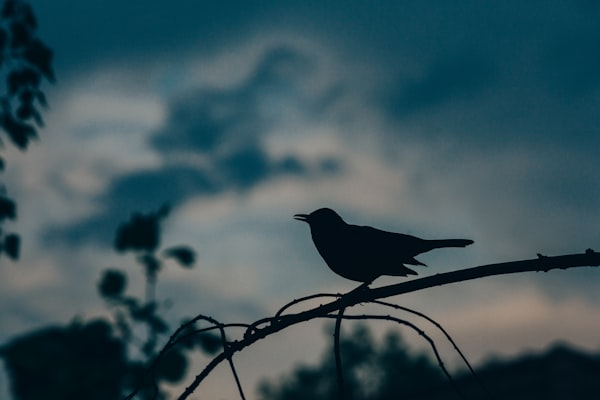

In [14]:
import requests
from IPython.display import Image

image_url = "https://images.unsplash.com/photo-1463003160077-801f9fd8d095?q=80&w=600"
content = requests.get(image_url).content
Image(content)

In [15]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image? What mood does the image represents?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

output_message = llm.invoke([message])
content_text = to_markdown(output_message.content)
content_text

> Certainly!
> 
> **What's in the image:**
> 
> The image shows a silhouette of a bird perched on a branch against a cloudy sky. The bird appears to be a blackbird or a similar species, and it has its beak slightly open, as if it's singing or calling out. The sky behind is a mix of dark and light clouds, suggesting either early morning or dusk. There are also out-of-focus silhouettes of foliage to the left and bottom of the image, framing the bird nicely.
> 
> **Mood:**
> 
> The image evokes a sense of quiet contemplation, a touch of melancholy, and a feeling of being at the edge of day. The dark silhouettes against the soft, cloudy background create a somewhat dramatic and mysterious atmosphere. The bird's open beak could suggest a sense of yearning or a call to the world, which adds an element of longing to the overall mood. The cool tones of the blue-grey sky also contribute to a calm and reflective feeling.